In [2]:
# Importing nessecary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Loading the dataset into a pandas DataFrame
df = pd.read_csv('/content/Future Sales Prediction.csv')

In [5]:
# Displaying the first few rows of the DataFrame
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# Displaying the shape of the Dataframe df
df.shape

(200, 4)

In [7]:
# Checking the null values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [8]:
# Create a scatter plot with a trendline
figure = px.scatter(
    data_frame=df,
    x="Sales",
    y="TV",
    size="TV",
    trendline="ols",
    title="Sales vs. TV Advertising Spend",
    labels={"Sales": "Sales", "TV": "TV Advertising Spend"},
    template="plotly_dark"  # Optional: change the theme for better visual appeal
)

# Show the plot
figure.show()

In [9]:
# Sales vs Radio Advertising Spend
figure_radio = px.scatter(
    data_frame=df,
    x="Sales",
    y="Radio",
    size="Radio",
    trendline="ols",
    title="Sales vs. Radio Advertising Spend",
    labels={"Sales": "Sales", "Radio": "Radio Advertising Spend"},
    template="plotly_dark"
)
figure_radio.show()

In [10]:
# Sales vs Newspaper Advertising Spend
figure_newspaper = px.scatter(
    data_frame=df,
    x="Sales",
    y="Newspaper",
    size="Newspaper",
    trendline="ols",
    title="Sales vs. Newspaper Advertising Spend",
    labels={"Sales": "Sales", "Newspaper": "Newspaper Advertising Spend"},
    template="plotly_dark"
)
figure_newspaper.show()

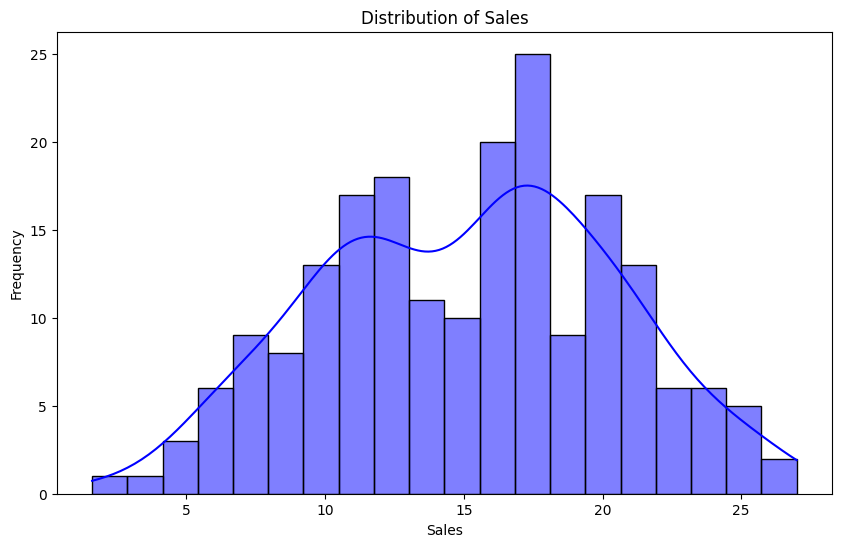

In [11]:
# Explore the distribution of the target variable (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

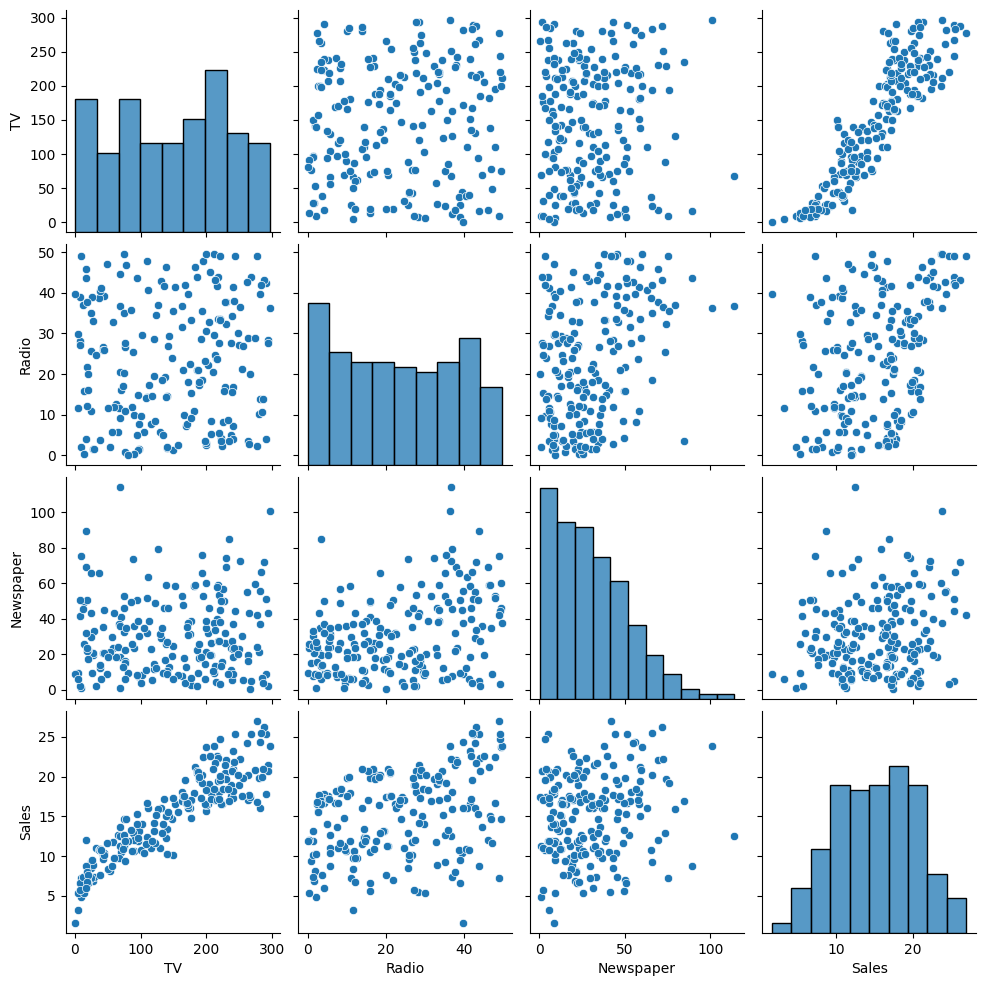

In [12]:
# Explore the relationship between features and the target variable using pairplot
sns.pairplot(df)
plt.show()

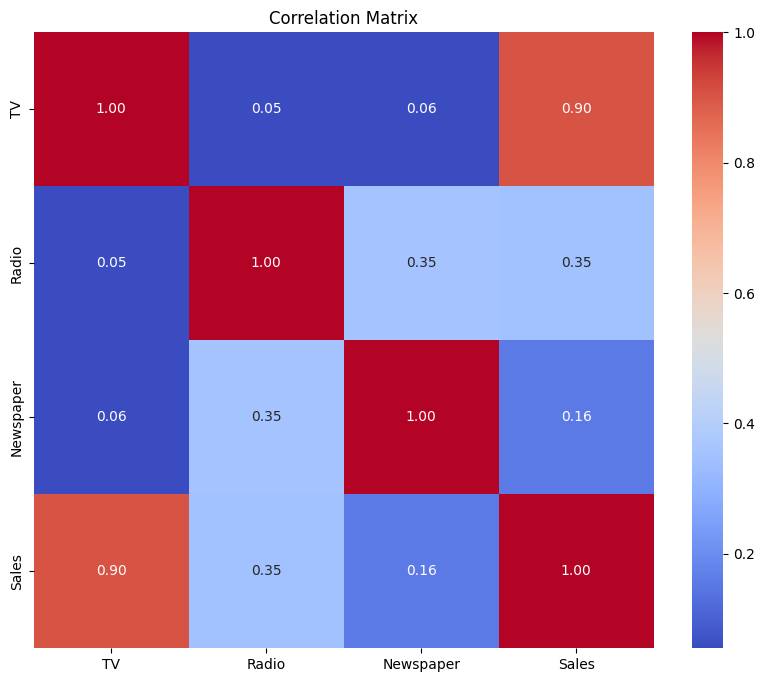

In [13]:
# plotting a correlation matrix heatmap
if df is not None:
    # Calculate correlation matrix
    correlation = df.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

In [34]:
# creating new columns in the DataFrame df where the square root of existing columns ('TV')
df['TV_sqrt'] = np.sqrt(df['TV'])
df['Radio_sqrt'] = np.sqrt(df['Radio'])
df['Newspaper_sqrt'] = np.sqrt(df['Newspaper'])

In [35]:
# Displaying the first few rows of the DataFrame
df.head()

,TV,Radio,Newspaper,Sales,TV_sqrt,TV_Radio_interaction,Radio_sqrt,Newspaper_sqrt
0,230.1,37.8,69.2,22.1,15.169047,8697.78,6.148170,8.318654
1,44.5,39.3,45.1,10.4,6.670832,1748.85,6.268971,6.715653
2,17.2,45.9,69.3,12.0,4.147288,789.48,6.774954,8.324662
3,151.5,41.3,58.5,16.5,12.308534,6256.95,6.426508,7.648529
4,180.8,10.8,58.4,17.9,13.446189,1952.64,3.286335,7.641989


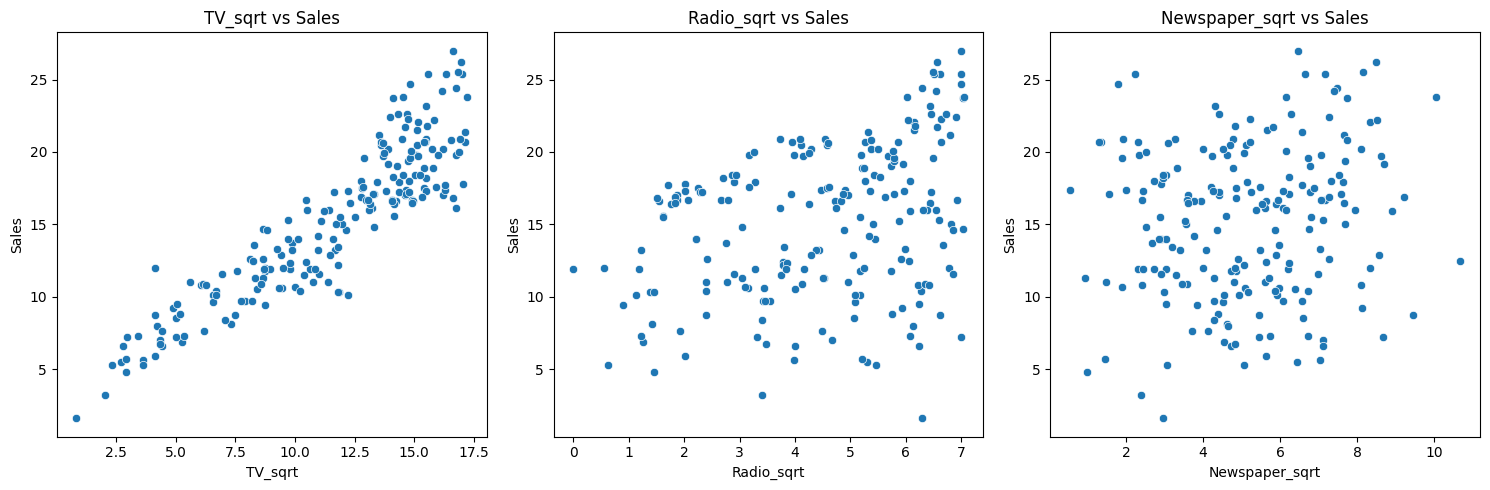

In [37]:
# Ploting TV_sqrt vs Sales
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV_sqrt', y='Sales', data=df)
plt.title('TV_sqrt vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio_sqrt', y='Sales', data=df)
plt.title('Radio_sqrt vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper_sqrt', y='Sales', data=df)
plt.title('Newspaper_sqrt vs Sales')

plt.tight_layout()

plt.show()

In [38]:
# Adding interaction terms between TV and Radio
df['TV_Radio_interaction'] = df['TV'] * df['Radio']

# Define features (X) and target (y)
x = df[['TV_sqrt','TV_Radio_interaction','Newspaper_sqrt','Radio_sqrt']]
y = y = df['Sales']

# Split Data
xtrain, xtest,ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Choosing the model
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [40]:
# Evaluate Model
ypred = model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1.807299421379613
R^2 Score: 0.9415134276326858


In [41]:
# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [9.24377359e-01 4.67658637e-04 6.36733740e-02 2.72299816e-01]
Intercept: 1.463838009765162


In [42]:
# Making predictions
ypred = model.predict(xtest)

In [43]:
# Display predictions
ypred

array([17.68341753, 21.08790291, 23.02746221,  6.90977474, 22.25215079,
       12.77693941, 21.66169934,  9.47196311, 16.33533263, 17.18714985,
        8.45928779,  9.54050821, 17.08050038,  5.3715836 , 13.24166706,
       15.28244018,  5.91043732, 18.16530589, 11.78988888, 20.39869284,
       21.03019462, 12.56291979,  9.82652659, 22.57507615, 10.33319828,
        8.95475894, 21.41961866, 14.55868426, 11.83639012,  5.76220234,
       15.50515382, 11.32210872, 21.50263807,  8.01140344, 20.17814748,
       21.29266431, 11.00215794, 22.41160038, 13.46872795,  6.96602216])

In [44]:
ytest

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [48]:
# features = [[TV, Radio, Newspaper]]
features = np.array([[15.169047,	8697.78,	8.318654,	6.148170]])
print(model.predict(features))

[21.75717588]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



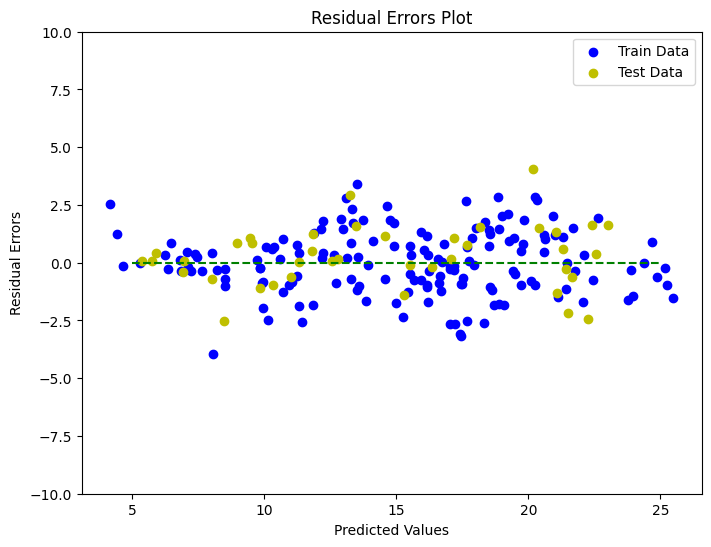

In [49]:
# Plot residual errors
plt.figure(figsize=(8, 6))

# Plot residual errors for training data
plt.scatter(model.predict(xtrain), model.predict(xtrain) - ytrain, color='b', label='Train Data')

# Plot residual errors for test data
plt.scatter(model.predict(xtest), model.predict(xtest) - ytest, color='y', label='Test Data')

# Add a horizontal line at y=0
plt.hlines(y=0, xmin=5, xmax=25, color='g', linestyle='--')

# Set Y-axis limits for better visualization
plt.ylim(-10, 10)

# Add labels and title
plt.title('Residual Errors Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Errors')

# Add legend
plt.legend()

# Show plot
plt.show()